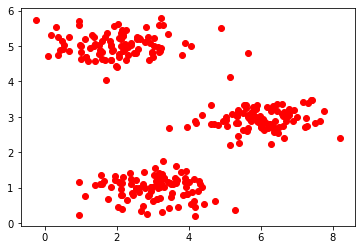

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('ex7data2.mat')
X = data['X']
plt.plot(X[:,0], X[:,1], 'ro')
plt.show()

In [145]:
def setIdx(X, mu):
    idx = np.zeros(X.shape[0])
    for i in range(0, X.shape[0]-1):
        muNorm = np.array(np.linalg.norm(X[i,:]-mu, axis=1))
        idx[i] = np.argmin(muNorm, axis=0)
        idx[i] = int(idx[i])
    return idx

In [146]:
def updateCentroids(X, mu, idx):
    for i in range(0, mu.shape[0]-1):
        mu[i] = np.mean(X[idx==i,:], axis=0)
    return mu

In [147]:
def plotGraph(X, idx, clusters):
    for i in range(0, clusters):
        plt.scatter(X[idx==i,0], X[idx==i,1])

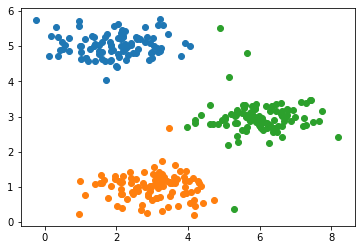

In [151]:
converged = False
clusters = 3
centr = np.random.randint(0, high=X.shape[0], size=clusters)
mu = np.array(X[centr,:])
while not converged:
    idx = setIdx(X, mu)
    muNew = updateCentroids(X, mu, idx)
    if (muNew == mu).all():
        converged = True
    mu = muNew
        
plotGraph(X, idx, clusters)

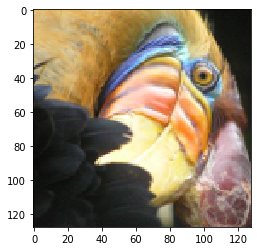

In [168]:
img = plt.imread('bird_small.png')
plt.imshow(img)
img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [180]:
def showCompressedImg(img, mu, idx):
    newImg = np.zeros((img.shape[0], 3), dtype=int)
    for i in range(0, img.shape[0]):
        newImg[i,:] = mu[int(idx[i])]
    newImg = newImg.reshape(1106, 988, 3)
    plt.imshow(newImg)

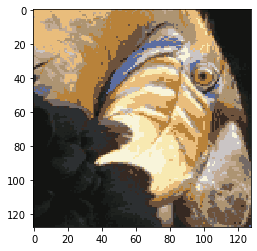

In [172]:
converged = False
clusters = 16
centr = np.random.randint(0, high=img.shape[0], size=clusters)
mu = np.array(img[centr,:])
while not converged:
    idx = setIdx(img, mu)
    muNew = updateCentroids(img, mu, idx)
    if (muNew == mu).all():
        converged = True
    mu = muNew
        
showCompressedImg(img, mu, idx)

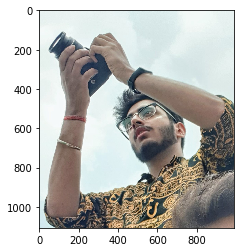

In [182]:
img = plt.imread('mypic.jpg')
plt.imshow(img)
img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

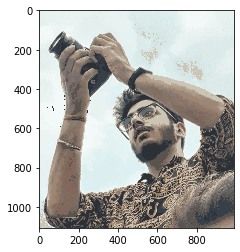

In [183]:
converged = False
clusters = 50
centr = np.random.randint(0, high=img.shape[0], size=clusters)
mu = np.array(img[centr,:])
while not converged:
    idx = setIdx(img, mu)
    muNew = updateCentroids(img, mu, idx)
    if (muNew == mu).all():
        converged = True
    mu = muNew
        
showCompressedImg(img, mu, idx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


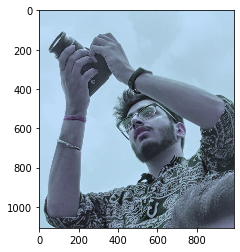

In [35]:
# Reconstructed image
img = plt.imread('mypic.jpg')
img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

cov = np.matmul(img.T, img)
U, S, V = np.linalg.svd(cov)
Ured = U[:,0:2]
compImg = np.matmul(img, Ured)
recImg = np.matmul(Ured, compImg.T).T
recImg = recImg/(np.max(recImg))
recImg = recImg.reshape(1106, 988, 3)
plt.imshow(recImg)